# Analyzing Los Angeles Crimes from 2020 to 2024 

### Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Import Dataset

In [3]:
df = pd.read_csv('LA_Crime_2020_2024.csv')

In [4]:
df.shape

(326478, 11)

### Handling Missing Values

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326478 entries, 0 to 326477
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           326478 non-null  int64  
 1   Date Rptd       326478 non-null  object 
 2   DATE OCC        326478 non-null  object 
 3   TIME OCC        326478 non-null  int64  
 4   AREA            326478 non-null  int64  
 5   AREA NAME       326478 non-null  object 
 6   Vict Age        326478 non-null  int64  
 7   Vict Sex        326478 non-null  object 
 8   Weapon Used Cd  326478 non-null  float64
 9   LAT             326478 non-null  float64
 10  LON             326478 non-null  float64
dtypes: float64(3), int64(4), object(4)
memory usage: 27.4+ MB


### Rename the columns

In [6]:
df.rename(columns={'Date Rptd': 'Date_reported', 'DATE OCC':'Date_occured', 'TIME OCC': 'Time_occured', 'AREA': "Area_code", 
                   'AREA NAME': 'Area_name', "Vict Age": 'Victime_age', 'Vict Sex': 'Victime_sex', 'Weapon Used Cd': 'Weapon_used_code',
                    'LAT': "Latitude", "LON": 'Longitude' }, inplace=True)

### Change the datatypes of some columns

In [7]:
df['Date_reported'] = pd.to_datetime(df['Date_reported'])
df['Date_occured'] = pd.to_datetime(df['Date_occured'])
df['Area_code'] = df['Area_code'].astype('object')


/tmp/ipykernel_44416/3007824967.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date_reported'] = pd.to_datetime(df['Date_reported'])
/tmp/ipykernel_44416/3007824967.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date_occured'] = pd.to_datetime(df['Date_occured'])


In [8]:
df

,DR_NO,Date_reported,Date_occured,Time_occured,Area_code,Area_name,Victime_age,Victime_sex,Weapon_used_code,Latitude,Longitude
0,211904005,2020-12-31,2020-12-31,1220,19,Mission,26,M,400.0,34.2336,-118.4535
1,221908151,2022-04-12,2020-10-01,1,19,Mission,8,F,400.0,34.2285,-118.4258
2,230204214,2023-01-05,2020-02-01,800,2,Rampart,7,F,400.0,34.0868,-118.2991
3,210705560,2020-11-27,2020-11-27,1800,7,Wilshire,31,F,307.0,34.0452,-118.3351
4,231907172,2023-03-21,2020-03-15,1200,19,Mission,12,F,400.0,34.2246,-118.4654
...,...,...,...,...,...,...,...,...,...,...,...
326473,241604405,2024-01-14,2024-01-13,720,16,Foothill,36,M,207.0,34.2271,-118.3878
326474,242004546,2024-01-16,2024-01-16,1510,20,Olympic,80,F,400.0,34.0690,-118.3054
326475,241414280,2024-10-16,2024-10-16,1546,14,Pacific,46,M,500.0,33.9469,-118.3703
326476,240104953,2024-01-15,2024-01-15,100,1,Central,0,X,500.0,34.0685,-118.2460


### 1. What is the time with the highest number of crimes?

In [9]:
df['Time_formatted'] = df['Time_occured'].apply(lambda t: f"{t // 100}:{t % 100:02d}")

In [10]:
df['Time_hours']= pd.to_datetime(df['Time_formatted'], format='%H:%M').dt.strftime('%H')

In [11]:
df

,DR_NO,Date_reported,Date_occured,Time_occured,Area_code,Area_name,Victime_age,Victime_sex,Weapon_used_code,Latitude,Longitude,Time_formatted,Time_hours
0,211904005,2020-12-31,2020-12-31,1220,19,Mission,26,M,400.0,34.2336,-118.4535,12:20,12
1,221908151,2022-04-12,2020-10-01,1,19,Mission,8,F,400.0,34.2285,-118.4258,0:01,00
2,230204214,2023-01-05,2020-02-01,800,2,Rampart,7,F,400.0,34.0868,-118.2991,8:00,08
3,210705560,2020-11-27,2020-11-27,1800,7,Wilshire,31,F,307.0,34.0452,-118.3351,18:00,18
4,231907172,2023-03-21,2020-03-15,1200,19,Mission,12,F,400.0,34.2246,-118.4654,12:00,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
326473,241604405,2024-01-14,2024-01-13,720,16,Foothill,36,M,207.0,34.2271,-118.3878,7:20,07
326474,242004546,2024-01-16,2024-01-16,1510,20,Olympic,80,F,400.0,34.0690,-118.3054,15:10,15
326475,241414280,2024-10-16,2024-10-16,1546,14,Pacific,46,M,500.0,33.9469,-118.3703,15:46,15
326476,240104953,2024-01-15,2024-01-15,100,1,Central,0,X,500.0,34.0685,-118.2460,1:00,01


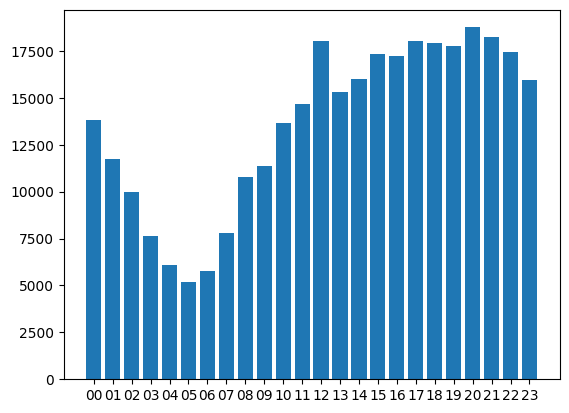

In [ ]:
crime_time = df['Time_hours'].value_counts().reset_index().sort_values(by="Time_hours")
plt.bar(crime_time["Time_hours"], crime_time["count"])
plt.show()

### 2. What dates had the highest number of crimes?

In [23]:
crime_date = df['Date_occured'].value_counts().reset_index().sort_values(by="count", ascending=False)
crime_date[:10]


,Date_occured,count
0,2020-01-01,508
1,2021-01-01,374
2,2020-05-30,338
3,2022-01-01,330
4,2021-07-04,329
5,2023-01-01,325
7,2023-07-04,307
6,2023-07-23,307
8,2023-09-01,306
9,2020-06-01,305


### 3. What age range is mostly affected by crimes?

In [33]:
def age_binner(age):
    if age<=10:
        return "0-10"
    elif age<=20:
        return "11-20"
    elif age<=30:
        return "21-30"
    elif age<=40:
        return "31-40"
    elif age<=50:
        return "41-50"
    elif age<=60:
        return "51-60"
    elif age<=70:
        return "61-70"
    else:
        return "70+"
    
df["Age_range"] = df["Victime_age"].map(age_binner)

In [34]:
age_range = df['Age_range'].value_counts().reset_index().sort_values(by="Age_range")
age_range

,Age_range,count
5,0-10,30244
4,11-20,30580
0,21-30,80366
1,31-40,72622
2,41-50,49192
3,51-60,36671
6,61-70,19273
7,70+,7530


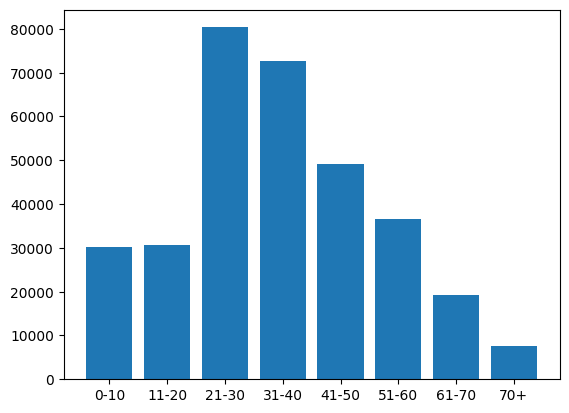

In [35]:
plt.bar(age_range["Age_range"], age_range["count"])
plt.show()

### 4. What year had the highest number of crimes?

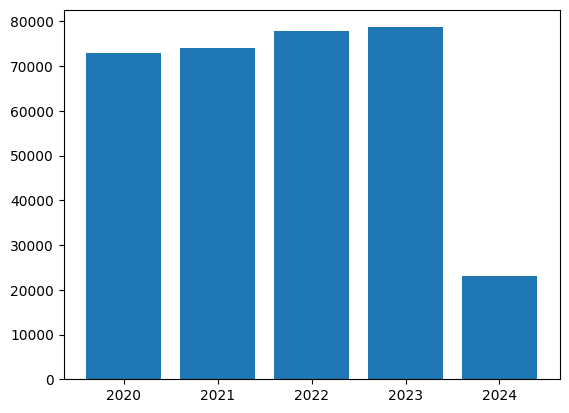

In [39]:
df['Year']= pd.to_datetime(df['Date_occured'], format='%Y-%M-%D').dt.strftime('%Y')
crime_year = df['Year'].value_counts().reset_index().sort_values(by="Year")
plt.bar(crime_year["Year"], crime_year["count"])
plt.show()

In [37]:
df

,DR_NO,Date_reported,Date_occured,Time_occured,Area_code,Area_name,Victime_age,Victime_sex,Weapon_used_code,Latitude,Longitude,Time_formatted,Time_hours,Age_range,Year
0,211904005,2020-12-31,2020-12-31,1220,19,Mission,26,M,400.0,34.2336,-118.4535,12:20,12,21-30,2020
1,221908151,2022-04-12,2020-10-01,1,19,Mission,8,F,400.0,34.2285,-118.4258,0:01,00,0-10,2020
2,230204214,2023-01-05,2020-02-01,800,2,Rampart,7,F,400.0,34.0868,-118.2991,8:00,08,0-10,2020
3,210705560,2020-11-27,2020-11-27,1800,7,Wilshire,31,F,307.0,34.0452,-118.3351,18:00,18,31-40,2020
4,231907172,2023-03-21,2020-03-15,1200,19,Mission,12,F,400.0,34.2246,-118.4654,12:00,12,11-20,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326473,241604405,2024-01-14,2024-01-13,720,16,Foothill,36,M,207.0,34.2271,-118.3878,7:20,07,31-40,2024
326474,242004546,2024-01-16,2024-01-16,1510,20,Olympic,80,F,400.0,34.0690,-118.3054,15:10,15,70+,2024
326475,241414280,2024-10-16,2024-10-16,1546,14,Pacific,46,M,500.0,33.9469,-118.3703,15:46,15,41-50,2024
326476,240104953,2024-01-15,2024-01-15,100,1,Central,0,X,500.0,34.0685,-118.2460,1:00,01,0-10,2024
